In [20]:
# the essentials
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# read the image
image = cv2.imread('downloads/upstate-ny.jpg')

In [22]:
# convert the image to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [23]:
# set the color boundaries
blue_min = np.array([50, 80, 80], np.uint8)
blue_max = np.array([140, 255, 255], np.uint8)

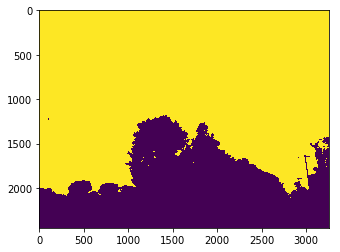

In [24]:
# prepare the mask of pixels in blue range
mask = cv2.inRange(image_hsv, blue_min, blue_max)
plt.imshow(mask)

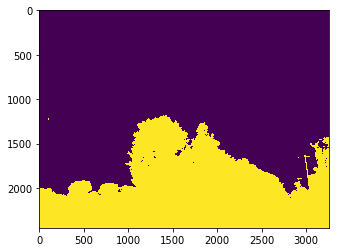

In [25]:
# inverse the mask to get parts not in blue
inverse_mask = cv2.bitwise_not(mask)
plt.imshow(inverse_mask)

In [26]:
# convert single channel mask to three channels
mask_rgb = cv2.cvtColor(inverse_mask, cv2.COLOR_GRAY2RGB)

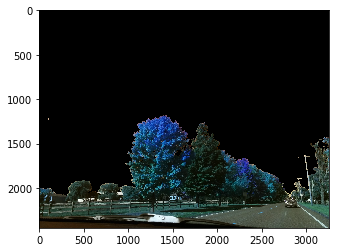

In [27]:
# remove the sky
masked_image = cv2.bitwise_and(image, mask_rgb)
plt.imshow(masked_image)

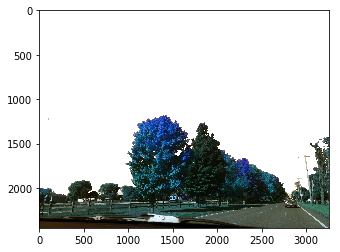

In [28]:
# replace the removed parts with white
masked_final = cv2.addWeighted(masked_image, 1,
                              cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB),
                              1,0)
plt.imshow(masked_final)

In [29]:
# convert image to RGB
masked_final_rgb = cv2.cvtColor(masked_final, cv2.COLOR_BGR2RGB)

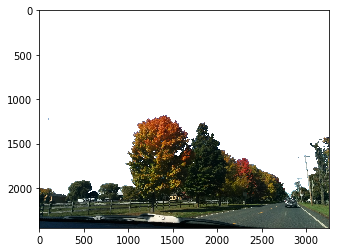

In [30]:
plt.imshow(masked_final_rgb)

In [32]:
cv2.imwrite("output_mask.jpg", masked_final)

True